In [2]:
import random as rd
from typing import Tuple
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



# Q1

Considere a Tabela 9.1 (com os parâmetros σ= 10 e b = 8/3). Escolha condições iniciais adequadas
e obtenha numericamente, no plano zx, exemplos dos atratores caóticos,
pontos de equilíbrio atrativos e transiente caótico, para um valor do parâmetro
de controle r em cada um dos intervalos mencionados nessa tabela.

r = 0

dx/dt = -10x + 10y

dy/dt = -xz + rx - y

dz/dt = xy - 8/3*z

In [4]:
def lorenz (x:float,y:float,z:float,r: float) -> Tuple[float,float,float]:
    xt = -10*x + 10*y
    yt = -x*z + r*x - y
    zt = x*y - 8/3*z
    
    return (xt,yt,zt)

Tuples() are faster than lists[]. If you're defining a constant set of values and all you're ever going to do with it is iterate through it, use a tuple instead of a list.

It makes your code safer if you “write-protect” data that does not need to be changed. Using a tuple instead of a list is like having an implied assert statement that this data is constant, and that special thought (and a specific function) is required to override that.

#* operator to unpack the arguments out of a list or tuple:
#zip: Esta função retorna uma lista de tuplas, onde a i-ésima tupla contém o i-ésimo elemento de cada um dos argumentos
a = ("John", "Charles", "Mike")
b = ("Jenny", "Christy", "Monica")

x = zip(a, b)
print(tuple(x)): (('John', 'Jenny'), ('Charles', 'Christy'), ('Mike', 'Monica'))


#Python list method list() takes sequence types and converts them to lists. This is used to convert a given tuple into list.


In [5]:
def rk4 (x: float, y: float, z: float, r: float, n: int,  dt: float) -> Tuple[float,float,float]:
    for i in range (n):
        (xa,ya,za) = lorenz(x,y,z,r)
        (xb,yb,zb) = lorenz(x+dt*0.5*xa,y+dt*0.5*ya,z+dt*0.5*za,r)
        (xc,yc,zc) = lorenz(x+dt*0.5*xb,y+dt*0.5*yb,z+dt*0.5*zb,r)
        (xd,yd,zd) = lorenz(x+dt*xc,y+dt*yc,z+dt*zc,r)
        x = x + dt/6*(xa + 2*xb + 2*xc + xd)
        y = y + dt/6*(ya + 2*yb + 2*yc + yd)
        z = z + dt/6*(za + 2*zb + 2*zc + zd)
        yield (x,y,z)


In [ ]:
#(X,Y,Z) = zip(*rk4(x0,y0,z0,r,n,dt)) #X (e o mesmo para Y e Z) é um vetor (tuple) 
                                    #com todos os n valores calculados de x(t)

In [301]:
def plot3d (r, n, dt,N,s):
    rd.seed(s)
    fig = plt.figure ( figsize = (8.5,8.5))
    ax = fig.gca ( projection = '3d' )
    for i in range(N):
        x0 = rd.randint(-20,20) 
        y0 = rd.randint(-20,20)
        z0 = rd.randint(-10,50)
        (X,Y,Z) = zip(*rk4(x0,y0,z0,r,n,dt))
        ax.plot ( X, Y, Z, linewidth = 0.5)
    ax.grid ( True )
    ax.set_xlabel ( 'x' )
    ax.set_ylabel ( 'y' )
    ax.set_zlabel ( 'z' )
    ax.set_title ( 'Lorenz 3D Plot' )
    
    #plt.savefig ( 'lorenz_ode_3d.png' )
    
    # Make the line multi-coloured by plotting it in segments of length s which
    # change in colour across the whole time series.
    #s = 100
    #c = np.linspace(0,1,n) #number of time points
    #for i in range(0,n-s,s):
    #    ax.plot(X[i:i+s+1], Y[i:i+s+1], Z[i:i+s+1], color=(1,c[i],0), alpha=0.5)
        
        
    # Remove all the axis clutter, leaving just the curve.
    #ax.set_axis_off()
    plt.show ( )
    return 


def plot2d(r,n,dt,N,s):
    rd.seed(s)
    for i in range(N):
        x0 = rd.randint(-20,20) 
        y0 = rd.randint(-20,20)
        z0 = rd.randint(-10,50)
        (X,Y,Z) = zip(*rk4(x0,y0,z0,r,n,dt))
        plt.plot(X, Z, ',')
    plt.xlim((-20,20))
    plt.ylim((0,50))
    plt.xlabel('x')
    plt.ylabel('z')
    plt.title('Atrator de Lorenz')
    
    #plt.savefig ( 'r0_2d.png' )
    
    plt.show()
    
    return

Return sends a specified value back to its caller whereas Yield can produce a sequence of values. We should use yield when we want to iterate over a sequence, but don’t want to store the entire sequence in memory.

Yield are used in Python generators. A generator function is defined like a normal function, but whenever it needs to generate a value, it does so with the yield keyword rather than return. If the body of a def contains yield, the function automatically becomes a generator function.

In [299]:
s=4
r=28
n = 50000 #number of time points
dt = 0.005 #interval between points
N = 4 #number of initial points
c = (8/3*(r-1))**(1/2)
print(c)

8.48528137423857


6.324555320336759


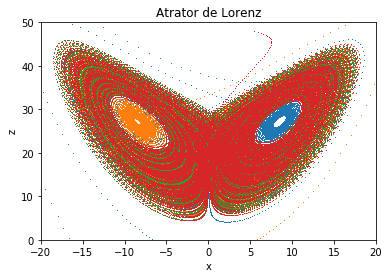

In [302]:
plot2d(r,n,dt,N,s)

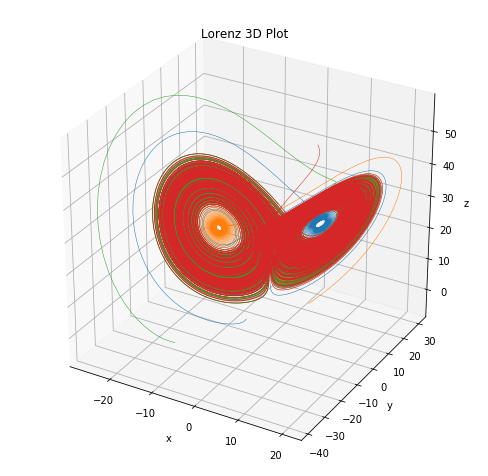

In [297]:
plot3d(r,n,dt,N,s)

# Q2
Simulations from 1400 to 1900 (from beginning): 

In [8]:
def q2_rk4 (x: float, y: float, z: float, r: float, n: int,  dt: float) -> Tuple[float,float,float]:
    for i in range (n):
        (xa,ya,za) = lorenz(x,y,z,r)
        (xb,yb,zb) = lorenz(x+dt*0.5*xa,y+dt*0.5*ya,z+dt*0.5*za,r)
        (xc,yc,zc) = lorenz(x+dt*0.5*xb,y+dt*0.5*yb,z+dt*0.5*zb,r)
        (xd,yd,zd) = lorenz(x+dt*xc,y+dt*yc,z+dt*zc,r)
        x = x + dt/6*(xa + 2*xb + 2*xc + xd)
        y = y + dt/6*(ya + 2*yb + 2*yc + yd)
        z = z + dt/6*(za + 2*zb + 2*zc + zd)
    return (x,y,z)

In [140]:
def YZ_q2_plot2d(x0,y0,z0,r,Ni,n,dt):
    x0,y0,z0 = q2_rk4(x0,y0,z0,r,Ni,dt)
    (X,Y,Z) = zip(*rk4(x0,y0,z0,r,n,dt)) 
    plt.plot(Y, Z, 'k-')
    text = ['14','15','16','17','18']
    for i in range (5):
        j = i
        i = 100*i
        plt.plot(Y[i], Z[i], 'b.')
        plt.text(Y[i], Z[i], text[j],verticalalignment='bottom', horizontalalignment='right', color='blue',fontsize=8)
    yc = (8*(r-1)/3)**(1/2)
    zc = r-1
    plt.plot(Y[499], Z[499], 'b.')
    plt.text(0, 21, '19',verticalalignment='bottom', color='blue',fontsize=8)
    plt.plot(yc, zc, 'k.')
    plt.text(yc, zc+1, 'C+',verticalalignment='bottom', color='black',fontsize=8)
    plt.plot(-yc, zc, 'k.')
    plt.text(-yc, zc+1, 'C-',verticalalignment='bottom', color='black',fontsize=8)
    plt.xlim((-25,25))
    plt.ylim((5,45))
    plt.xlabel('y')
    plt.ylabel('z')
    plt.title('Y-Z plane: Fig.2 Lorenz article')
    
    plt.savefig ( 'q2_fig21.png' )
    
    plt.show()
    
    return

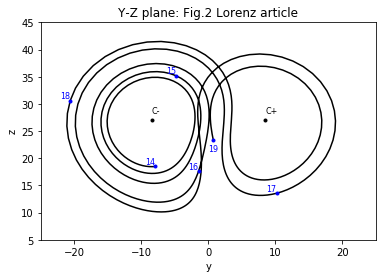

In [141]:
x0 = 0 #initial points
y0 = 1
z0 = 0
r = 28 #parameter
Ni = 1400 #Iteration to start ploting
n = 500   #Nf - Ni = 1900 - 1400 = 500 -> number of points to plot
dt = 0.01 #time step 

YZ_q2_plot2d(x0,y0,z0,r,Ni,n,dt)

In [166]:
def YX_q2_plot2d(x0,y0,z0,r,Ni,n,dt):
    x0,y0,z0 = q2_rk4(x0,y0,z0,r,Ni,dt)
    (X,Y,Z) = zip(*rk4(x0,y0,z0,r,n,dt)) 
    plt.plot(Y, X, 'k-')
    text = ['14','15','16','17','18']
    for i in range (5):
        j = i
        i = 100*i
        plt.plot(Y[i], X[i], 'b.')
        plt.text(Y[i], X[i]-0.5, text[j],verticalalignment='bottom', horizontalalignment='right', color='blue',fontsize=8)
    yc = (8*(r-1)/3)**(1/2)
    xc = (8*(r-1)/3)**(1/2)
    plt.plot(Y[499], X[499], 'b.')
    plt.text(Y[499], X[499], '19',verticalalignment='bottom', color='blue',fontsize=8)
    plt.plot(yc, xc, 'k.')
    plt.text(yc, xc, 'C+',verticalalignment='bottom', color='black',fontsize=8)
    plt.plot(-yc, -xc, 'k.')
    plt.text(-yc, -xc, 'C-',verticalalignment='bottom', color='black',fontsize=8)
    plt.xlim((-25,25))
    plt.ylim((20,-20))
    plt.xlabel('y')
    plt.ylabel('x')
    plt.title('Y-X plane: Fig.2 Lorenz article')
    
    plt.savefig ( 'q2_fig22.png' )
    
    plt.show()
    
    return

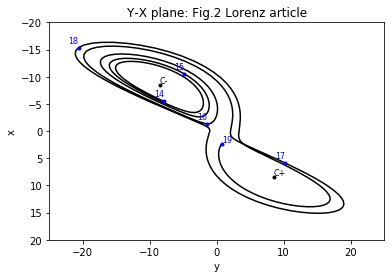

In [167]:
YX_q2_plot2d(x0,y0,z0,r,Ni,n,dt)

## Fig 4

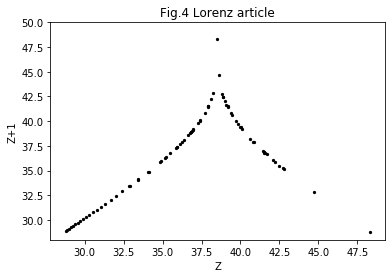

In [342]:
x0 = 0 #initial points
y0 = 1
z0 = 0
r = 28 #parameter
n = 6000
dt = 0.01 #time step 

(X,Y,Z) = list(zip(*rk4(x0,y0,z0,r,n,dt)) ) #calcula todos os pontos até n=6000
plotx = []
ploty = []
j=0
k = 0
for i in range(n):
    if (i<n-2 and Z[i+1]>Z[i] and Z[i+1]>Z[i+2]): # salva os máximos no vetor correspondente a M+1 
        j = j+1
        ploty.append(Z[i+1])  

plotx.append(38.5) #condição inicial usada no texto

while (k<j-1):   #atribue ao vetor M os valores de M+1-1
    plotx.append(ploty[k])
    k = k+1   

plt.scatter(plotx,ploty, s=5,c='k', marker='o')
plt.ylim(28,50)
plt.xlabel('Z')
plt.ylabel('Z+1')
plt.title('Fig.4 Lorenz article')
        
plt.savefig ( 'q2_fig4.png' )
   
plt.show()
    

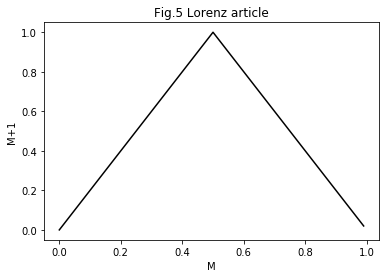

In [3]:
import numpy as np
m = [0 + i/100 for i in range(100)]
m_1=[0 for i in range(100)]
for i in range (100):
    if (i<=50):
        m_1[i] = 2*m[i]
    if (i>50):
        m_1[i] = 2 -2*m[i]



plt.plot(m,m_1,'k-')
plt.xlabel('M')
plt.ylabel('M+1')
plt.title('Fig.5 Lorenz article')
        
plt.savefig ( 'q2_fig5.png' )
   
plt.show()